In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2,NaN,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,NaN,1.0,2.0,0.0,0.0,NaN,3.0,NaN,3,0.0,...,NaN,0,0.0,0.0,0.0,NaN,2.0,2.0,0.0,7.0
2,NaN,2.0,1.0,0.0,0.0,NaN,3.0,0.0,2,0.0,...,NaN,0,0.0,2.0,0.0,NaN,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,NaN,0.0,NaN,NaN,2,2.0,...,NaN,0,0.0,2.0,0.0,NaN,2.0,2.0,0.0,NaN
4,2.0,2.0,NaN,NaN,0.0,0.0,2.0,0.0,2,0.0,...,NaN,0,0.0,3.0,NaN,2.0,NaN,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,2.0,NaN,2.0,1.0,0.0,NaN,NaN,0,0.0,...,0.0,0,0.0,3.0,NaN,0.0,0.0,3.0,0.0,70.0
354,2.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3,2.0,...,0.0,0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,70.0
355,2.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,0,0.0,...,0.0,0,0.0,2.0,NaN,0.0,0.0,2.0,0.0,70.0
356,2.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,0,0.0,...,0.0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	141
float64		column 2	35
float64		column 3	106
float64		column 4	70
float64		column 5	35
float64		column 6	71
float64		column 7	106
float64		column 8	70
int64		column 9	0
float64		column 10	36
int64		column 11	0
float64		column 12	71
float64		column 13	106
float64		column 14	71
float64		column 15	71
float64		column 16	70
float64		column 17	141
float64		column 18	70
float64		column 19	106
float64		column 20	35
float64		column 21	36
float64		column 22	71
float64		column 23	35
float64		column 24	141
float64		column 25	106
int64		column 26	0
float64		column 27	35
float64		column 28	106
float64		column 29	70
float64		column 30	141
float64		column 31	105
float64		column 32	70
float64		column 33	35
float64		column 34	35


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,217.000000,323.00000,252.000000,288.000000,323.000000,287.000000,252.000000,288.000000,358.000000,322.000000,...,252.000000,358.000000,323.000000,252.000000,288.000000,217.000000,253.000000,288.000000,323.000000,323.000000
mean,2.087558,1.80805,1.591270,1.381944,0.597523,0.418118,0.138889,0.267361,0.622905,0.478261,...,0.337302,0.474860,0.445820,0.908730,0.430556,0.078341,0.086957,1.836806,0.554180,36.445820
std,0.574684,0.67359,0.795658,1.081981,0.859145,0.938355,0.543483,0.733502,0.990278,0.868894,...,0.779031,0.871705,0.958457,1.087599,0.934457,0.370611,0.427650,0.681589,1.105887,15.068148
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

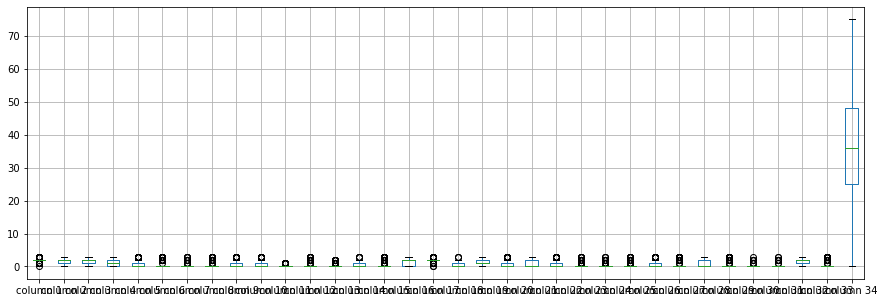

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.087558
column 2      1.808050
column 3      1.591270
column 4      1.381944
column 5      0.597523
column 6      0.418118
column 7      0.138889
column 8      0.267361
column 9      0.622905
column 10     0.478261
column 11     0.122905
column 12     0.317073
column 13     0.178571
column 14     0.484321
column 15     0.271777
column 16     1.361111
column 17     1.963134
column 18     0.496528
column 19     1.297619
column 20     0.634675
column 21     0.956522
column 22     0.560976
column 23     0.294118
column 24     0.221198
column 25     0.337302
column 26     0.474860
column 27     0.445820
column 28     0.908730
column 29     0.430556
column 30     0.078341
column 31     0.086957
column 32     1.836806
column 33     0.554180
column 34    36.445820
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.384560,0.274078,-0.075377,0.095637,0.078513,-0.051866,-0.052034,0.117828,0.138069,...,0.034560,0.097992,0.005935,0.081361,-0.034671,0.021117,0.050046,0.112844,-0.013365,0.057252
column 2,0.384560,1.000000,0.337717,-0.048333,0.014838,-0.044611,-0.098356,-0.095902,0.273054,0.285818,...,-0.102239,0.189119,-0.115564,0.054998,-0.140098,0.018206,0.006270,0.009526,-0.130975,0.011437
column 3,0.274078,0.337717,1.000000,-0.043116,0.195556,0.325797,-0.093226,0.195798,0.269379,0.159015,...,0.243857,0.321576,0.265611,-0.149647,0.218742,-0.117504,-0.113012,0.152262,0.221023,0.071590
column 4,-0.075377,-0.048333,-0.043116,1.000000,0.128043,0.374230,-0.191335,0.227364,-0.317083,-0.118819,...,0.285204,-0.166621,0.316846,0.011610,0.330241,-0.131957,-0.196188,-0.018027,0.368802,0.056535
column 5,0.095637,0.014838,0.195556,0.128043,1.000000,0.335320,-0.178037,0.249587,-0.028834,0.065181,...,0.332235,-0.026681,0.357036,-0.097426,0.345441,-0.160527,-0.125011,0.065250,0.363701,0.115462
column 6,0.078513,-0.044611,0.325797,0.374230,0.335320,1.000000,-0.115959,0.846113,-0.260136,-0.242905,...,0.897870,-0.099696,0.902707,0.041012,0.866320,-0.101338,-0.063009,0.283568,0.906680,0.058517
column 7,-0.051866,-0.098356,-0.093226,-0.191335,-0.178037,-0.115959,1.000000,-0.100957,0.206159,-0.092210,...,-0.071453,-0.129425,-0.131556,0.012154,-0.142533,0.820923,0.836207,-0.052627,-0.130877,-0.350530
column 8,-0.052034,-0.095902,0.195798,0.227364,0.249587,0.846113,-0.100957,1.000000,-0.243718,-0.220450,...,0.889203,-0.111620,0.884052,0.107851,0.859930,-0.086307,-0.067500,0.267634,0.906656,0.075557
column 9,0.117828,0.273054,0.269379,-0.317083,-0.028834,-0.260136,0.206159,-0.243718,1.000000,0.640237,...,-0.226813,0.480594,-0.274377,-0.398856,-0.290706,0.152041,0.221876,-0.097869,-0.266670,-0.061385
column 10,0.138069,0.285818,0.159015,-0.118819,0.065181,-0.242905,-0.092210,-0.220450,0.640237,1.000000,...,-0.242109,0.428303,-0.237258,-0.385413,-0.243173,-0.080263,0.028201,0.024352,-0.249334,0.103398


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+120,34+120+120,34+120+120+120,34+120+120+120+120,34+120+120+120+120+120,34+120+120+120+120+120+120,34+120+120+120+120+120+120+120,34+120+120+120+120+120+120,34+120+120+120+120+120,34+120+120+120+120,34+120+120+120,34+120+120,34+120,34], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 63.130202380093664
Epoch: 1 , loss: 63.45655007795854
Epoch: 2 , loss: 63.30734617059881
Epoch: 3 , loss: 61.473445718938656
Epoch: 4 , loss: 60.37830196727406
Epoch: 5 , loss: 59.68290987881747
Epoch: 6 , loss: 59.74682461131703
Epoch: 7 , loss: 58.79492777044123
Epoch: 8 , loss: 58.58846993879838
Epoch: 9 , loss: 58.256926103071734
Epoch: 10 , loss: 58.23544120788574
Epoch: 11 , loss: 57.500992341475055
Epoch: 12 , loss: 57.35913519425826
Epoch: 13 , loss: 56.89756930958141
Epoch: 14 , loss: 56.79921757091176
Epoch: 15 , loss: 56.774735710837625
Epoch: 16 , loss: 56.1983476118608
Epoch: 17 , loss: 55.7871541109952
Epoch: 18 , loss: 56.22389724037864
Epoch: 19 , loss: 55.283696087923914
Epoch: 20 , loss: 55.52862774242055
Epoch: 21 , loss: 55.20270625027743
Epoch: 22 , loss: 54.5427790555087
Epoch: 23 , loss: 54.68521482294256
Epoch: 24 , loss: 54.0376749905673
Epoch: 25 , loss: 54.07316017150879
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.095293
column 7      0.054132
column 8      0.000000
column 9      3.000000
column 10     0.311738
column 11     0.000000
column 12     0.147206
column 13     0.000000
column 14     0.396326
column 15     0.000000
column 16     1.000000
column 17     1.569806
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.648104
column 22     0.000000
column 23     0.000000
column 24     0.149121
column 25     0.176443
column 26     0.000000
column 27     0.000000
column 28     0.715907
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,-1.65483,...,0.000000,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
1,1.579434,0.000000,0.000000,0.000000,0.000000,0.358681,0.000000,0.301276,0,0.00000,...,0.424776,0,0.000000,0.0,0.000000,-1.954840,0.000000,0.00000,0.0,0.000000
2,-0.131526,0.000000,0.000000,0.000000,0.000000,0.026921,0.000000,0.000000,0,0.00000,...,0.272398,0,0.000000,0.0,0.000000,-3.032811,0.000000,0.00000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.520868,0.000000,-1.966772,0.455749,0,0.00000,...,0.470644,0,0.000000,0.0,0.000000,-1.972049,0.000000,0.00000,0.0,25.619164
4,0.000000,0.000000,0.121318,0.934002,0.000000,0.000000,0.000000,0.000000,0,0.00000,...,0.374228,0,0.000000,0.0,0.201587,0.000000,-2.133689,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.723364,0.000000,2.211877,0.000000,0.000000,0.000000,0.063116,0.526938,0,0.00000,...,0.000000,0,0.000000,0.0,0.372675,0.000000,0.000000,0.00000,0.0,0.000000
354,0.000000,-0.397926,0.235710,1.937196,0.000000,0.000000,0.000000,0.000000,0,0.00000,...,0.000000,0,0.000000,0.0,0.000000,0.000000,-0.070982,0.00000,0.0,0.000000
355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368254,0,0.00000,...,0.000000,0,0.000000,0.0,0.343669,0.000000,0.000000,0.00000,0.0,0.000000
356,0.000000,0.000000,1.430975,-1.761685,0.000000,0.000000,0.000000,0.264305,0,0.00000,...,0.000000,0,0.000000,0.0,0.398724,0.000000,0.000000,1.01116,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(125.479485201788, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.16552437392192926

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      1.759014
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.077216
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.196266
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     1.154968
column 22     0.000000
column 23     0.000000
column 24     0.341618
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.011874
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2,0.34517,...,0.000000,0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,2.0,0.000000
1,2.579434,1.000000,2.000000,0.000000,0.000000,0.358681,3.000000,0.301276,3,0.00000,...,0.424776,0,0.000000,0.0,0.000000,0.045160,2.000000,2.00000,0.0,7.000000
2,1.868474,2.000000,1.000000,0.000000,0.000000,0.026921,3.000000,0.000000,2,0.00000,...,0.272398,0,0.000000,2.0,0.000000,-0.032811,3.000000,2.00000,0.0,7.000000
3,2.000000,2.000000,2.000000,1.000000,0.520868,0.000000,0.033228,0.455749,2,2.00000,...,0.470644,0,0.000000,2.0,0.000000,0.027951,2.000000,2.00000,0.0,32.619164
4,2.000000,2.000000,1.121318,0.934002,0.000000,0.000000,2.000000,0.000000,2,0.00000,...,0.374228,0,0.000000,3.0,0.201587,2.000000,-0.133689,2.00000,0.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.723364,2.000000,2.211877,2.000000,1.000000,0.000000,0.063116,0.526938,0,0.00000,...,0.000000,0,0.000000,3.0,0.372675,0.000000,0.000000,3.00000,0.0,70.000000
354,2.000000,2.602074,2.235710,1.937196,0.000000,0.000000,0.000000,0.000000,3,2.00000,...,0.000000,0,0.000000,0.0,0.000000,0.000000,-0.070982,1.00000,0.0,70.000000
355,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.368254,0,0.00000,...,0.000000,0,0.000000,2.0,0.343669,0.000000,0.000000,2.00000,0.0,70.000000
356,2.000000,1.000000,1.430975,1.238315,0.000000,0.000000,0.000000,0.264305,0,0.00000,...,0.000000,0,0.000000,0.0,0.398724,0.000000,0.000000,2.01116,0.0,70.000000


In [20]:
imputations[-1].to_excel("DERM_NN_20(imp).xlsx", index=False, header=False)